### Importing packages

In [127]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import random
np.random.seed(random.randint(0,1000))

### Plotting functions

In [123]:
def plot_points(features, labels):
    X = np.array(features)
    y = np.array(labels)
    sick = X[np.argwhere(y==1)]
    not_sick = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in sick],
                [s[0][1] for s in sick],
                s = 100,
                color = 'cyan',
                edgecolor = 'k',
                marker = '^')
    plt.scatter([s[0][0] for s in not_sick],
                [s[0][1] for s in not_sick],
                s = 100,
                color = 'red',
                edgecolor = 'k',
                marker = 's')
    plt.xlabel('good things')
    plt.ylabel('bad things')
    plt.legend(['sick','not_sick'])

def draw_line(a,b,c, starting=0, ending=3, **kwargs):
    # Plotting the line ax + by + c = 0
    x = np.linspace(starting, ending, 1000)
    plt.plot(x, -c/b - a*x/b, **kwargs)

def plot_boundary(features, labels, coefficients, intercept):
    # Define the range for the features
    x_min, x_max = features[:, 0].min() - 1, features[:, 0].max() + 1
    y_min, y_max = features[:, 1].min() - 1, features[:, 1].max() + 1

    # Generate x values for the line
    xx = np.linspace(x_min, x_max, 100)

    # Calculate corresponding y values using the equation of the line:
    # w0*x0 + w1*x1 + intercept = 0
    # x1 = (-w0*x0 - intercept) / w1
    yy = (-coefficients[0] * xx - intercept) / coefficients[1]

    # Plot the decision boundary (line)
    plt.plot(xx, yy, color='green', linestyle='-', label='Decision Boundary')

    # Re-plot the original points
    # Separate points based on their labels
    features_label0 = features[labels == 0]
    features_label1 = features[labels == 1]

    # Plot points with label 0 as red squares
    plt.scatter(features_label0[:, 0], features_label0[:, 1], c='red', marker='s', label='Label 0')

    # Plot points with label 1 as blue triangles
    plt.scatter(features_label1[:, 0], features_label1[:, 1], c='blue', marker='^', label='Label 1')

    # Add labels and title
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Perceptron Decision Boundary and Data Points')
    plt.legend()
    plt.grid(True)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()

### Defining and plotting our dataset

In [111]:
dataset = pd.read_csv('exercise1.csv')
dataset

,patient,cough,temperature,bad_breath,fatigue,diagnosis
0,1,0,1,1,1,1
1,2,1,1,0,1,1
2,3,1,0,1,1,1
3,4,1,1,1,0,1
4,5,1,0,0,1,0
5,6,0,1,1,0,0
6,7,0,1,0,0,0
7,8,0,0,0,1,0


Take features (cough, tempterature, bad_breath, fatigue) and labels (diagnosis) from the dataset and plot them.

In [112]:
features = dataset.iloc[:,1:-1].values
features

array([[0, 1, 1, 1],
       [1, 1, 0, 1],
       [1, 0, 1, 1],
       [1, 1, 1, 0],
       [1, 0, 0, 1],
       [0, 1, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1]])

In [113]:
ones_per_row = features.sum(axis=1)
zeros_per_row = features.shape[1] - ones_per_row
features_optimal = np.stack([zeros_per_row, ones_per_row], axis=1)
features_optimal

array([[1, 3],
       [1, 3],
       [1, 3],
       [1, 3],
       [2, 2],
       [2, 2],
       [3, 1],
       [3, 1]])

In [114]:
labels = dataset.iloc[:,-1:].values.transpose().flatten()
labels

array([1, 1, 1, 1, 0, 0, 0, 0])

In [115]:
features_example = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[2,3],[3,2]])

labels_example = np.array([0,0,0,0,1,1,1,1])

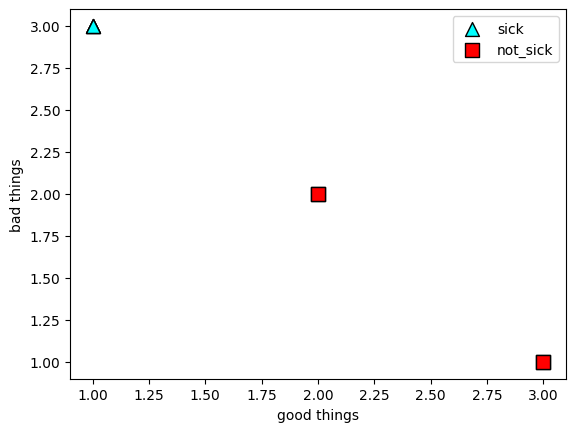

In [124]:
# Plotting the points
plot_points(features_optimal, labels)

# Uncomment the following line to see a good line fit for this data.
#draw_line(1,1,-3.5)

In [128]:
from sklearn.linear_model import Perceptron

# Create a Perceptron model
perceptron = Perceptron()

# Fit the model to the data
perceptron.fit(features_optimal, labels)

# Predict the labels for the features
predictions = perceptron.predict(features_optimal)

print("Predictions:", predictions)

Predictions: [1 1 1 1 0 0 0 0]


In [129]:
# The coefficients of the model
coefficients = perceptron.coef_[0]
intercept = perceptron.intercept_[0]

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [-7.  3.]
Intercept: -1.0


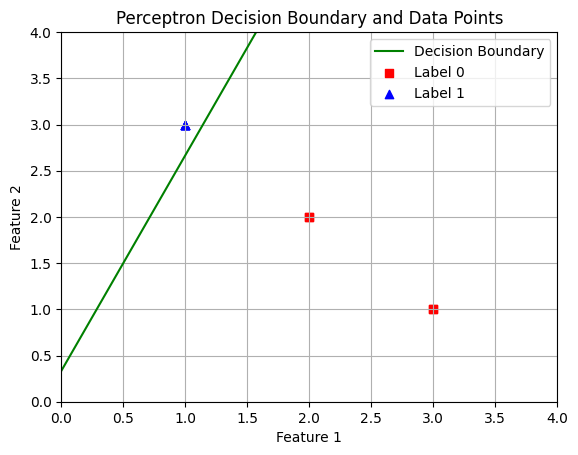

In [130]:
plot_boundary(features_optimal, labels, coefficients, intercept)